In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
mushrooms = pd.read_csv('./training_mush.csv')

In [5]:
mushrooms

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [6]:
X_train = mushrooms.drop(['class'], axis=1)
y_train = mushrooms['class']
np.random.seed(0)

In [7]:
clf_rf = RandomForestClassifier(random_state=0)

In [8]:
parametrs = {'n_estimators': range(10, 50, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 7),
             'min_samples_split': range(2, 9, 2)}
parametrs

{'n_estimators': range(10, 50, 10),
 'max_depth': range(1, 12, 2),
 'min_samples_leaf': range(1, 7),
 'min_samples_split': range(2, 9, 2)}

In [9]:
grid_search_cv = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [10]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [11]:
grid_search_cv.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

<AxesSubplot:>

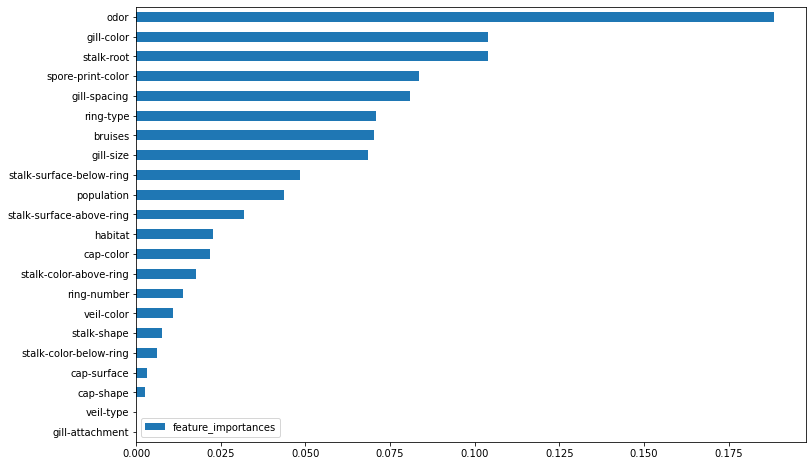

In [12]:
feature_importances = grid_search_cv.best_estimator_.feature_importances_
feature_importances_df = pd.DataFrame({'feature': list(X_train), 'feature_importances': feature_importances})
feature_importances_df.sort_values(by='feature_importances', ascending=False)
imp = pd.DataFrame(grid_search_cv.best_estimator_.feature_importances_, index=X_train.columns, columns=['feature_importances'])
imp.sort_values('feature_importances').plot(kind='barh', figsize=(12, 8))

In [13]:
best_clf = grid_search_cv.best_estimator_

In [14]:
testing_mush = pd.read_csv('./testing_mush.csv')

In [15]:
testing_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [16]:
predictions = best_clf.predict(testing_mush)

In [17]:
np.sum(predictions)

976

In [18]:
testing_y_mush = pd.read_csv('./testing_y_mush.csv')

In [19]:
testing_y_mush

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(predictions, testing_y_mush)

array([[1055,    0],
       [   0,  976]], dtype=int64)

<AxesSubplot:>

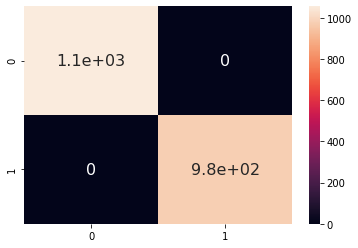

In [22]:
sns.heatmap(confusion_matrix(predictions, testing_y_mush), annot=True,annot_kws={"size": 16})

In [23]:
invasion = pd.read_csv('./invasion.csv')

In [24]:
invasion

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [25]:
operative_information = pd.read_csv('./operative_information.csv')

In [26]:
operative_information

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [27]:
X_train = invasion.drop(['class'], axis=1)

In [28]:
y_train = invasion['class']

In [29]:
y_train.unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [30]:
parametrs = {'n_estimators': range(1, 10),
             'max_depth': range(1, 12, 2)}
clf_rf = RandomForestClassifier(random_state=0)
grid_search_cv = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)
best_clf = grid_search_cv.best_estimator_

In [31]:
predictios = best_clf.predict(operative_information)

In [32]:
grid_search_cv.best_params_

{'max_depth': 3, 'n_estimators': 6}

In [33]:
s = pd.Series(predictios)
s.groupby(s).count()

cruiser      230
fighter      675
transport    595
dtype: int64

In [34]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'feature': list(X_train), 'feature_importances': feature_importances})
feature_importances_df

,feature,feature_importances
0,g_reflection,0.103355
1,i_reflection,0.158932
2,speed,0.107925
3,brightness,0.495920
4,time_of_observance,0.000000
5,volume,0.133868


In [51]:
space_dange = pd.read_csv('./space_can_be_a_dangerous_place.csv')

In [52]:
space_dange.describe()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,172.575669,179.794570,22.779988,-0.000431,0.109990,0.929990,0.99035,0.902020
std,99.394833,103.914551,13.120118,0.997952,0.312879,0.255165,0.09776,0.297289
min,0.000000,0.000000,0.000000,-4.418405,0.000000,0.000000,0.00000,0.000000
25%,86.775000,90.000000,11.454300,-0.677894,0.000000,1.000000,1.00000,1.000000
50%,172.600000,180.000000,22.783200,-0.001029,0.000000,1.000000,1.00000,1.000000
75%,258.500000,270.000000,34.122000,0.673115,0.000000,1.000000,1.00000,1.000000
max,344.900000,359.000000,45.526800,4.205237,1.000000,1.000000,1.00000,1.000000


In [53]:
clf = RandomForestClassifier()

In [54]:
X_train = space_dange.drop(['dangerous'], axis=1)

In [55]:
y_train = space_dange['dangerous']

In [60]:
parametrs = {'n_estimators': range(10, 50, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 7),
             'min_samples_split': range(2, 9, 2)}
grid_search_cv = GridSearchCV(clf, parametrs, cv=3, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)
best_clf = grid_search_cv.best_estimator_

In [61]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'feature': list(X_train), 'feature_importances': feature_importances})
feature_importances_df

,feature,feature_importances
0,r,0.009979
1,phi,0.009270
2,peradventure_index,0.008757
3,dustiness,0.009797
4,black_hole_is_near,0.017999
5,buggers_were_noticed,0.469178
6,nearby_system_has_planemo,0.475020


In [57]:
feature_importances = clf.feature_importances_
feature_importances_df = pd.DataFrame({'feature': list(X_train), 'feature_importances': feature_importances})
feature_importances_df

,feature,feature_importances
0,r,0.184203
1,phi,0.178999
2,peradventure_index,0.183522
3,dustiness,0.239751
4,black_hole_is_near,0.003790
5,buggers_were_noticed,0.119998
6,nearby_system_has_planemo,0.089738


In [ ]:
#sns.heatmap(space_dange, annot=True,annot_kws={"size": 16})